In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['figure.dpi'] = 70


In [2]:
df = pd.read_csv("marketing_data.csv")

In [3]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
df.shape

(2240, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [8]:
df.columns = df.columns.str.replace(" ", "")

In [9]:
df.Income = df.Income.str.replace("$", "").str.replace(",", "").astype(float)

In [10]:
df.Complain = df.Complain.apply(lambda x : "Yes" if x==1 else "No")


In [11]:
df.rename(columns = {"Response" : "AcceptedCmp6"}, inplace = True)

In [12]:
df.Complain.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data Visualization


<Axes: >

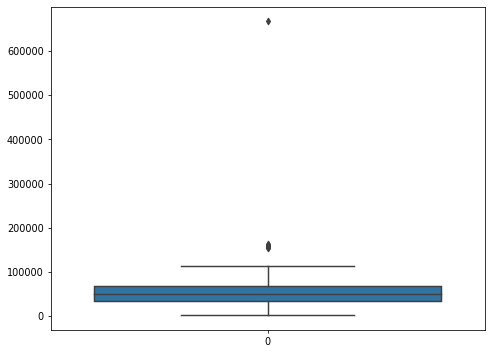

In [14]:
sns.boxplot(df.Income)

In [15]:
Q3 = df.Income.describe()['75%']
IQR = stats.iqr(df.Income)

In [16]:
df.Income[df.Income > (Q3 + 1.5 * IQR)]

Series([], Name: Income, dtype: float64)

In [17]:
df.drop(index = 527, inplace = True)

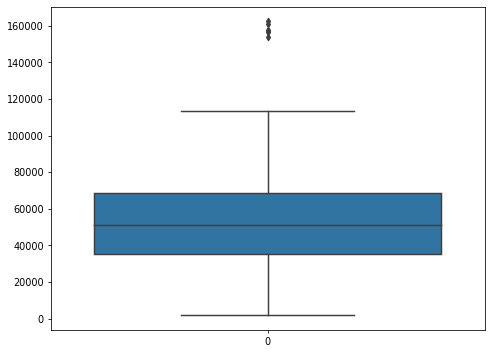

In [18]:
sns.boxplot(df.Income);

In [19]:
df.Income.describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

<Axes: xlabel='Income', ylabel='Count'>

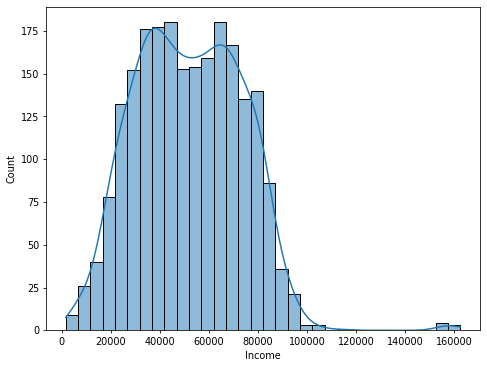

In [20]:
sns.histplot(df.Income, kde = True)

The general density is between 40-60 thousand

In [21]:
df['Income_level'] = df.Income.apply(lambda x : "Low" if x < 40000 else "Medium" if (x >= 40000 and x < 70000) else "High")

In [22]:
df.Income_level.value_counts()

Medium    976
Low       732
High      531
Name: Income_level, dtype: int64

Very high very little

In [23]:
df["TotalKid"] = df.Kidhome + df.Teenhome

In [24]:
df.groupby("TotalKid").Income.mean()

TotalKid
0    65705.565561
1    47158.646057
2    44612.310096
3    46677.000000
Name: Income, dtype: float64

<Axes: xlabel='TotalKid', ylabel='Income'>

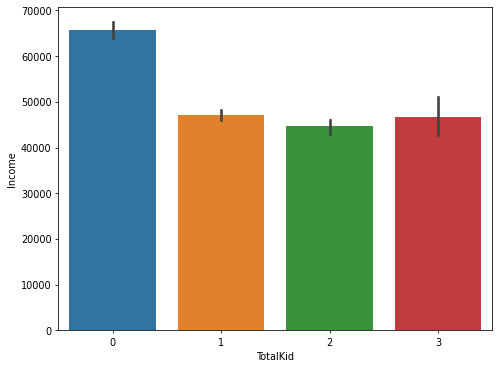

In [25]:
sns.barplot(x = df.TotalKid, y= df.Income)

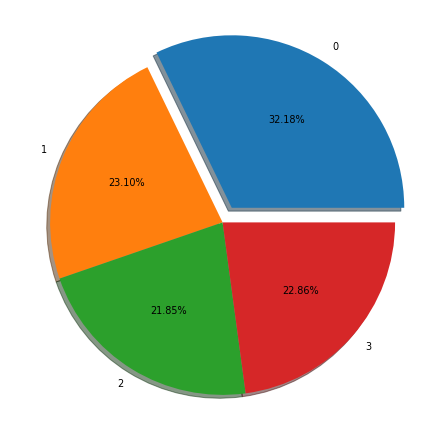

In [26]:
plt.figure(figsize = (10,8))
plt.pie(x = df.groupby("TotalKid").Income.mean().values, labels = df.groupby("TotalKid").Income.mean().index, autopct="%.2f%%",explode = [0.1,0,0,0], shadow = True);

In [27]:
df['TotalKid'].value_counts()

1    1127
0     638
2     421
3      53
Name: TotalKid, dtype: int64

In [28]:
df[df.TotalKid != 0].groupby("Income_level").TotalKid.count()

Income_level
High      166
Low       617
Medium    818
Name: TotalKid, dtype: int64

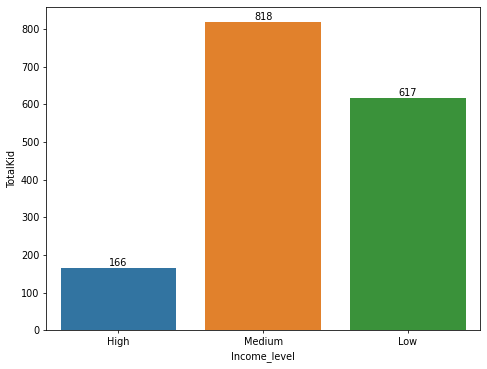

In [29]:
ax = sns.barplot(x = "Income_level", y = "TotalKid", estimator=np.count_nonzero, data = df, ci = None)

for i in ax.containers:
    plt.bar_label(i);

Very High winners have very few children


In [30]:
df.groupby("Income_level").TotalKid.value_counts()

Income_level  TotalKid
High          0           365
              1           134
              2            25
              3             7
Low           1           434
              2           163
              0           115
              3            20
Medium        1           559
              2           233
              0           158
              3            26
Name: TotalKid, dtype: int64

In [31]:
df.groupby("TotalKid").Income_level.value_counts(normalize = True)

TotalKid  Income_level
0         High            0.572100
          Medium          0.247649
          Low             0.180251
1         Medium          0.496007
          Low             0.385093
          High            0.118900
2         Medium          0.553444
          Low             0.387173
          High            0.059382
3         Medium          0.490566
          Low             0.377358
          High            0.132075
Name: Income_level, dtype: float64

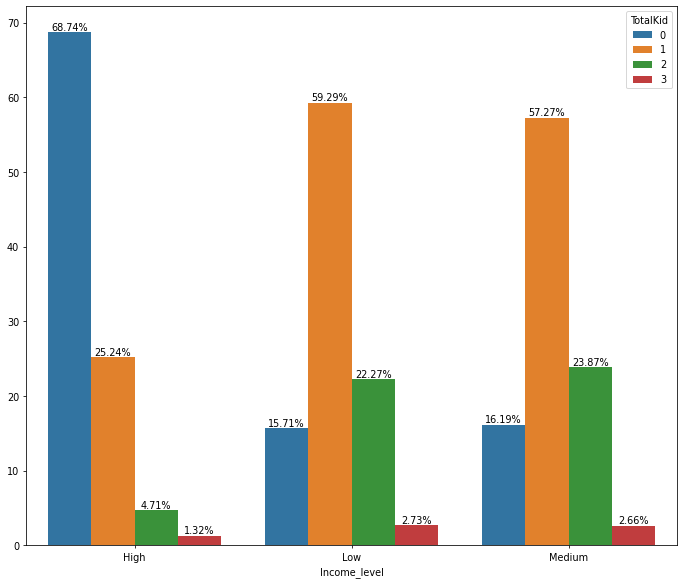

In [32]:
plt.figure(figsize = (12,10))

ax = sns.barplot(x = (df.groupby("Income_level").TotalKid.value_counts(normalize = True) * 100).index.get_level_values(0),
                 hue = (df.groupby("Income_level").TotalKid.value_counts(normalize = True) * 100).index.get_level_values(1),
                 y = (df.groupby("Income_level").TotalKid.value_counts(normalize = True) * 100).values)

for i in ax.containers:
    plt.bar_label(i, fmt = "%.2f%%");

majority of high-income families have no children

<Axes: xlabel='Recency', ylabel='Income'>

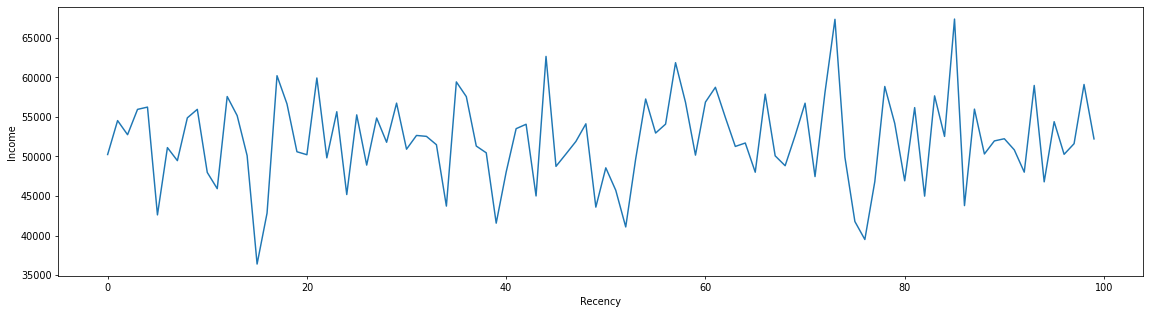

In [33]:
plt.figure(figsize=(20,5))
sns.lineplot(x = df.Recency, y = df.Income, ci = None)

In [34]:
df["MntTotal"] = df[df.columns[df.columns.str.match("Mnt")]].sum(axis = 1)

In [35]:
df.MntTotal.corr(df.Income)

0.7926502833622053

<Axes: xlabel='MntTotal', ylabel='Income'>

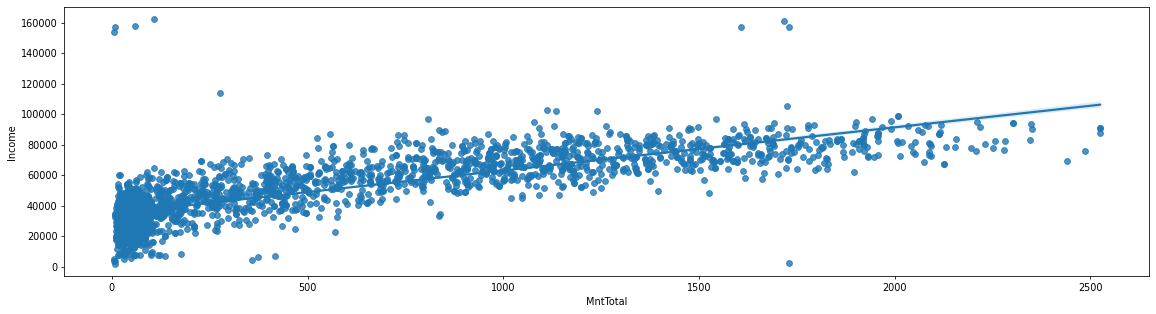

In [36]:
plt.figure(figsize = (20,5))
sns.regplot(x = df.MntTotal, y = df.Income)

There is a high positive correlation between total expenditure and Income level

In [37]:
df.groupby("Complain").Income.mean()

Complain
No     52034.254786
Yes    45242.285714
Name: Income, dtype: float64

([<matplotlib.patches.Wedge at 0x16434cd50>,
 [Text(-0.12040072510378896, 1.0933909023741153, 'No'),
  Text(0.12040072510378859, -1.0933909023741153, 'Yes')],
 [Text(-0.06567312278388487, 0.5963950376586082, '53.49%'),
  Text(0.06567312278388468, -0.5963950376586082, '46.51%')])

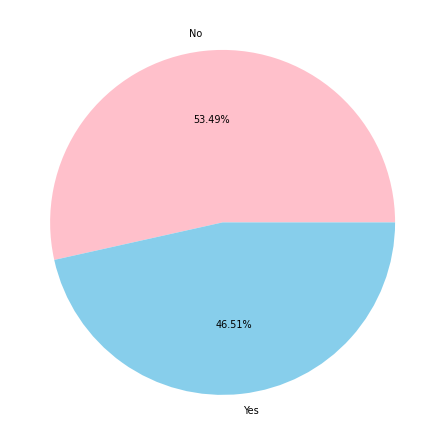

In [38]:
plt.figure(figsize = (10,8))

plt.pie(x = df.groupby("Complain").Income.mean().values,
       
    labels = df.groupby("Complain").Income.mean().index,
       autopct = "%.2f%%",
       colors = ["pink", "skyblue"])

Complainers have a slightly lower income level

In [39]:
df.groupby("Income_level").Complain.value_counts()

Income_level  Complain
High          No          529
              Yes           2
Low           No          720
              Yes          12
Medium        No          969
              Yes           7
Name: Complain, dtype: int64

array([[<Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Medium'}>, <Axes: >]], dtype=object)

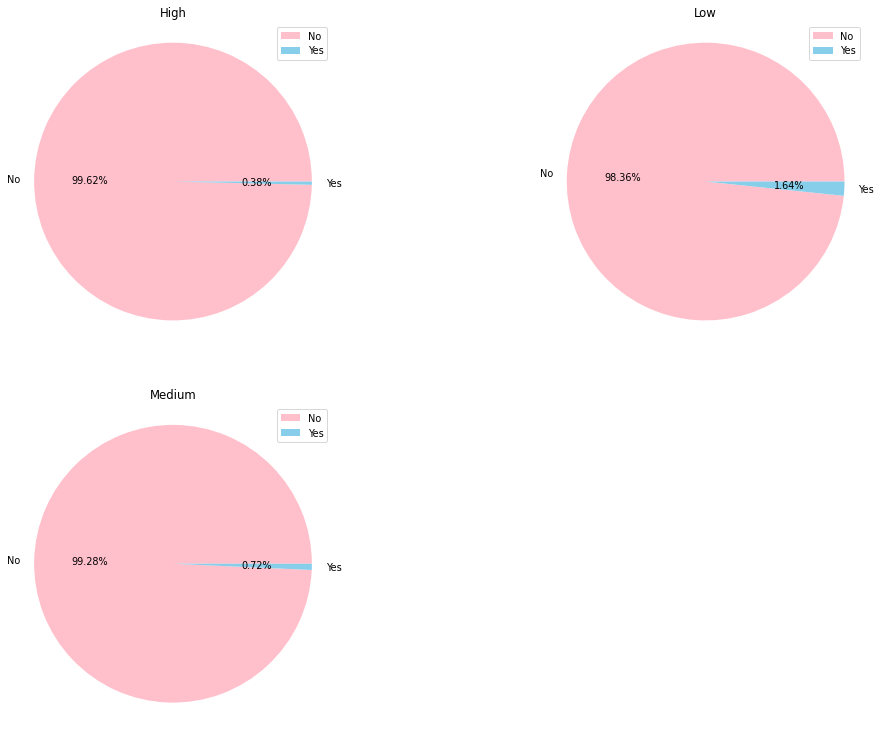

In [40]:
fig, axes = plt.subplots(figsize = (18,13))
df.groupby("Complain").Income_level.value_counts().unstack().plot(kind = "pie",
                                                               subplots = True,
                                                               layout = (2,2),
                                                               ax = axes,
                                                               colors = ["pink", "skyblue"],
                                                               radius = 1.09,
                                                               title = df.groupby("Income_level").Complain.value_counts().unstack().index.tolist(),
                                                               ylabel = "",
                                                               autopct = "%.2f%%")

Very high customer satisfaction

In [41]:
df['Total_Cmp'] = np.sum(df[df.columns[df.columns.str.contains("Cmp")]], axis = 1)

In [42]:
df.Total_Cmp.unique()

array([1, 2, 0, 3, 5, 4])

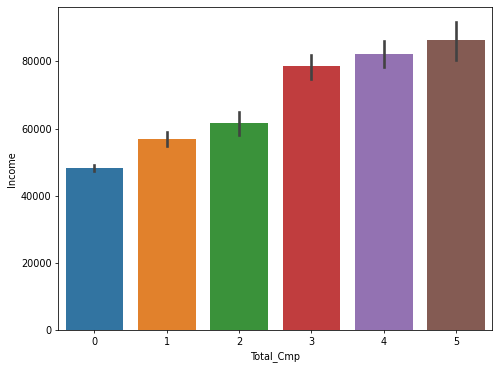

In [43]:
sns.barplot(x = df.Total_Cmp, y = df.Income);

In [44]:
df.groupby("Income_level").Total_Cmp.value_counts()

Income_level  Total_Cmp
High          0            264
              1            117
              2             68
              3             41
              4             32
              5              9
Low           0            614
              1             87
              2             30
              3              1
Medium        0            752
              1            166
              2             44
              3              9
              4              4
              5              1
Name: Total_Cmp, dtype: int64

In [45]:
df.groupby("Income_level").Total_Cmp.value_counts(normalize = True) * 100

Income_level  Total_Cmp
High          0            49.717514
              1            22.033898
              2            12.806026
              3             7.721281
              4             6.026365
              5             1.694915
Low           0            83.879781
              1            11.885246
              2             4.098361
              3             0.136612
Medium        0            77.049180
              1            17.008197
              2             4.508197
              3             0.922131
              4             0.409836
              5             0.102459
Name: Total_Cmp, dtype: float64

In [46]:
df.AcceptedCmp1.value_counts(normalize = True)*100

0    93.568557
1     6.431443
Name: AcceptedCmp1, dtype: float64

In [47]:
df.groupby("Income_level").AcceptedCmp1.value_counts(normalize = True)*100

Income_level  AcceptedCmp1
High          0               77.401130
              1               22.598870
Low           0               99.863388
              1                0.136612
Medium        0               97.643443
              1                2.356557
Name: AcceptedCmp1, dtype: float64

array([<Axes: title={'center': 'High'}>, <Axes: title={'center': 'Low'}>,
       <Axes: title={'center': 'Medium'}>], dtype=object)

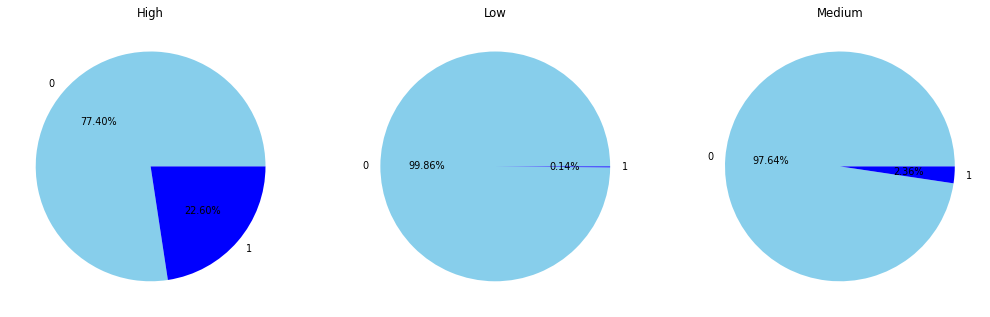

In [48]:
(df.groupby("AcceptedCmp1").Income_level.value_counts()).unstack().plot(kind = "pie",
                                                                       subplots = True,
                                                                       legend = False,
                                                                       ylabel = "",
                                                                       title = (df.groupby("Income_level").AcceptedCmp1.value_counts()).unstack().index.tolist(),
                                                                       figsize = (18,13),
                                                                       autopct = "%.2f%%",
                                                                       colors = ["skyblue", "blue"])

As the income level decreased, the number of participation in the 1st campaign decreased

In [49]:
df.AcceptedCmp2.value_counts(normalize = True) * 100

0    98.660116
1     1.339884
Name: AcceptedCmp2, dtype: float64

In [50]:
df.groupby("Income_level").AcceptedCmp2.value_counts(normalize = True) * 100

Income_level  AcceptedCmp2
High          0                96.986817
              1                 3.013183
Low           0               100.000000
Medium        0                98.565574
              1                 1.434426
Name: AcceptedCmp2, dtype: float64

array([<Axes: title={'center': 'High'}>, <Axes: title={'center': 'Low'}>,
       <Axes: title={'center': 'Medium'}>], dtype=object)

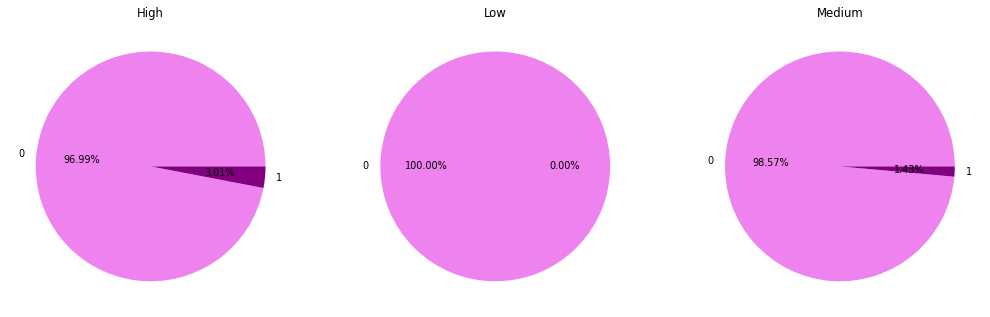

In [51]:
(df.groupby("AcceptedCmp2").Income_level.value_counts()).unstack().plot(kind = "pie",
                                                                       subplots = True,
                                                                       legend = False,
                                                                       ylabel = "",
                                                                       title = (df.groupby("Income_level").AcceptedCmp2.value_counts()).unstack().index.tolist(),
                                                                               autopct = "%.2f%%",
                                                                        figsize = (18,13),
                                                                      colors = ["violet", "purple"])

Participation in the 2nd Campaign is quiet low at all income levels

In [52]:
df.AcceptedCmp3.value_counts(normalize = True)*100

0    92.719964
1     7.280036
Name: AcceptedCmp3, dtype: float64

In [53]:
df.groupby("Income_level").AcceptedCmp3.value_counts(normalize =True)*100

Income_level  AcceptedCmp3
High          0               91.902072
              1                8.097928
Low           0               91.666667
              1                8.333333
Medium        0               93.954918
              1                6.045082
Name: AcceptedCmp3, dtype: float64

array([<Axes: title={'center': 'High'}>, <Axes: title={'center': 'Low'}>,
       <Axes: title={'center': 'Medium'}>], dtype=object)

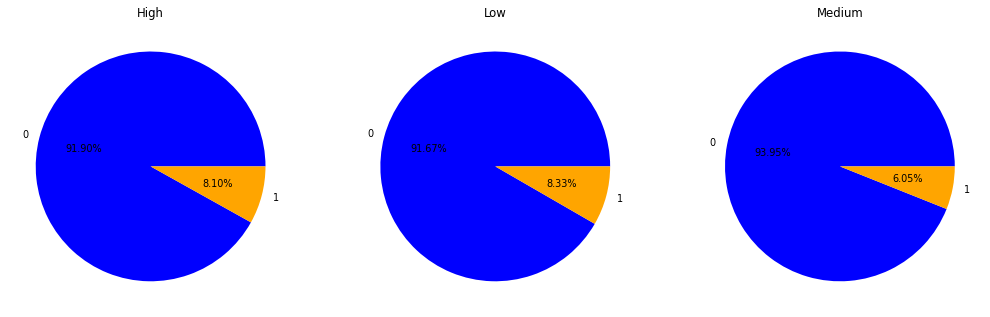

In [54]:
(df.groupby("AcceptedCmp3").Income_level.value_counts()).unstack().plot(kind = "pie",
                                                                       subplots = True,
                                                                       legend = False,
                                                                       ylabel = "",
                                                                       title = (df.groupby("Income_level").AcceptedCmp3.value_counts()).unstack().index.tolist(),
                                                                       figsize = (18,13),
                                                                       autopct = "%.2f%%",
                                                                       colors = ["blue", "orange"])

Participated rates at all income levels are very close

In [55]:
df.AcceptedCmp4.value_counts(normalize = True)*100

0    92.541313
1     7.458687
Name: AcceptedCmp4, dtype: float64

In [56]:
df.groupby("Income_level").AcceptedCmp4.value_counts(normalize = True)*100

Income_level  AcceptedCmp4
High          0               85.499058
              1               14.500942
Low           0               99.590164
              1                0.409836
Medium        0               91.086066
              1                8.913934
Name: AcceptedCmp4, dtype: float64

array([<Axes: title={'center': 'High'}>, <Axes: title={'center': 'Low'}>,
       <Axes: title={'center': 'Medium'}>], dtype=object)

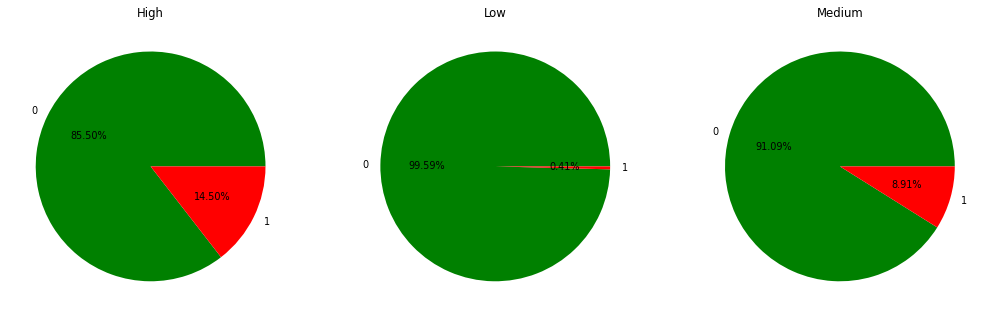

In [57]:
(df.groupby("AcceptedCmp4").Income_level.value_counts()).unstack().plot(kind = "pie",
                                                                       subplots = True,
                                                                       legend = False,
                                                                       ylabel ="",
                                                                       title = (df.groupby("Income_level").AcceptedCmp4.value_counts()).unstack().index.tolist(),
                                                                       figsize = (18,13),
                                                                       autopct = "%.2f%%",
                                                                       colors = ["green", "red"])

Rates are quite low in the low-income group

In [58]:
df.AcceptedCmp5.value_counts(normalize = True)*100

0    92.719964
1     7.280036
Name: AcceptedCmp5, dtype: float64

In [59]:
df.groupby("Income_level").AcceptedCmp5.value_counts(normalize = True)*100

Income_level  AcceptedCmp5
High          0                71.751412
              1                28.248588
Low           0               100.000000
Medium        0                98.668033
              1                 1.331967
Name: AcceptedCmp5, dtype: float64

array([<Axes: title={'center': 'High'}, ylabel='High'>,
       <Axes: title={'center': 'Low'}, ylabel='Low'>,
       <Axes: title={'center': 'Medium'}, ylabel='Medium'>], dtype=object)

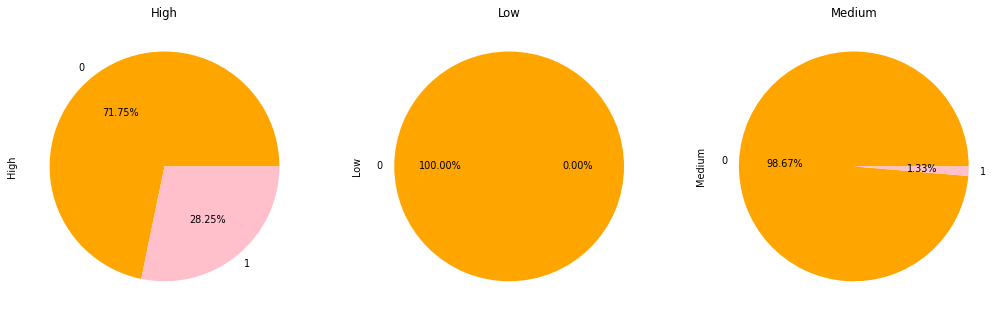

In [60]:
(df.groupby("AcceptedCmp5").Income_level.value_counts()).unstack().plot(kind = "pie",
                                                                       subplots = True,
                                                                       legend = False,
                                                                       title = (df.groupby("Income_level").AcceptedCmp5.value_counts()).unstack().index.tolist(),
                                                                       figsize = (18,13),
                                                                       autopct = "%.2f%%",
                                                                       colors = ["orange", "pink"])

The campaign attracted the high income group

In [61]:
df.AcceptedCmp6.value_counts(normalize =True)*100

0    85.082626
1    14.917374
Name: AcceptedCmp6, dtype: float64

In [62]:
df.groupby("Income_level").AcceptedCmp6.value_counts(normalize = True)*100

Income_level  AcceptedCmp6
High          0               73.069680
              1               26.930320
Low           0               88.387978
              1               11.612022
Medium        0               89.139344
              1               10.860656
Name: AcceptedCmp6, dtype: float64

array([<Axes: title={'center': 'High'}>, <Axes: title={'center': 'Low'}>,
       <Axes: title={'center': 'Medium'}>], dtype=object)

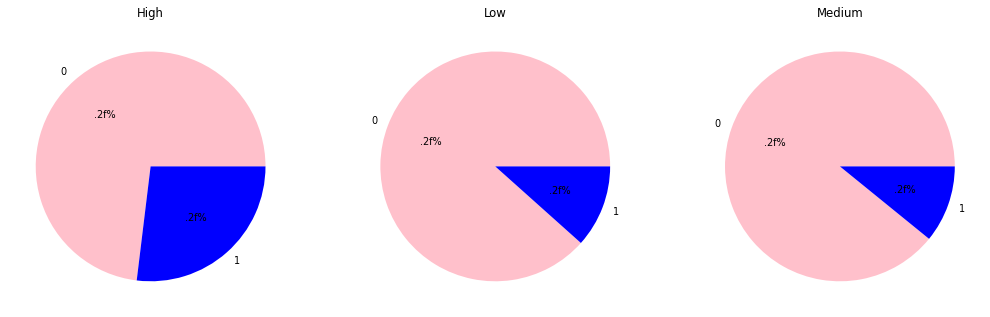

In [63]:
(df.groupby("AcceptedCmp6").Income_level.value_counts()).unstack().plot(kind ="pie",
                                                                        subplots = True,
                                                                       legend = False,
                                                                       ylabel = "",
                                                                       title = (df.groupby("Income_level").AcceptedCmp6.value_counts()).unstack().index.tolist(),
                                                                       figsize = (18,13),
                                                                       autopct = ".2f%%",
                                                                       colors = ["pink", "blue"])

The most participation is in this campaign

In [64]:
df.groupby("Income_level").NumDealsPurchases.sum()

Income_level
High       766
Low       1567
Medium    2871
Name: NumDealsPurchases, dtype: int64

In [65]:
df.groupby("Income_level").NumDealsPurchases.sum() / df.NumDealsPurchases.sum() * 100


Income_level
High      14.719447
Low       30.111453
Medium    55.169101
Name: NumDealsPurchases, dtype: float64

array([<Axes: ylabel='NumDealsPurchases'>], dtype=object)

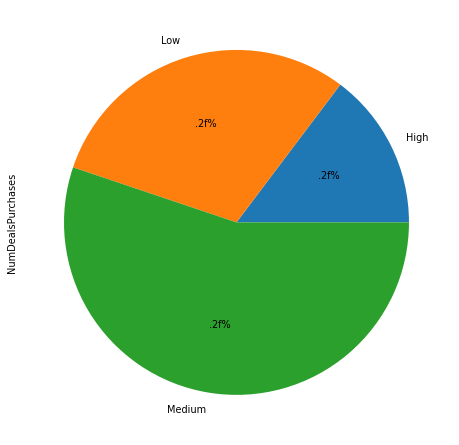

In [66]:
(df.groupby("Income_level").NumDealsPurchases.sum() / df.NumDealsPurchases.sum()).plot( kind = "pie",
                                                                                      subplots = True,
                                                                                      autopct = ".2f%%",
                                                                                      figsize = (10,8))

Discount shopping rates are high for middle-income people

In [67]:
df.groupby("Income_level").NumWebPurchases.sum() / df.NumWebPurchases.sum() *100

Income_level
High      30.206625
Low       17.175030
Medium    52.618345
Name: NumWebPurchases, dtype: float64

array([<Axes: ylabel='NumWebPurchases'>], dtype=object)

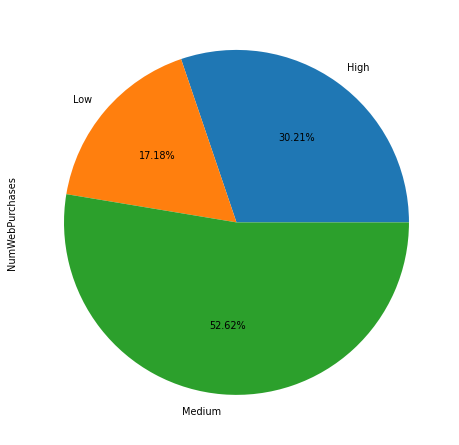

In [68]:
(df.groupby("Income_level").NumWebPurchases.sum() / df.NumWebPurchases.sum()).plot(kind = "pie",
                                                                                  subplots = True,
                                                                                  autopct = "%.2f%%",
                                                                                  figsize = (10,8))

The people who shop the most online are at medium level

In [69]:
df.groupby("Income_level").NumCatalogPurchases.sum() / df.NumCatalogPurchases.sum() * 100

Income_level
High      50.318685
Low        6.440792
Medium    43.240523
Name: NumCatalogPurchases, dtype: float64

array([<Axes: ylabel='NumCatalogPurchases'>], dtype=object)

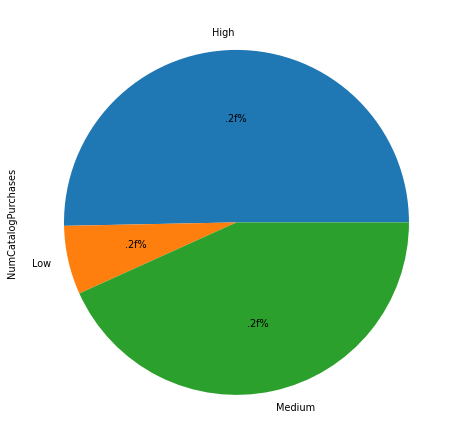

In [70]:
(df.groupby("Income_level").NumCatalogPurchases.sum() / df.NumCatalogPurchases.sum()).plot(kind = "pie",
                                                                                      subplots = True,
                                                                                      autopct = ".2f%%",
                                                                                      figsize = (10,8))

 The income levels of the catalog shoppers are as shown

In [71]:
df.groupby("Income_level").NumStorePurchases.sum() / df.NumStorePurchases.sum() *100

Income_level
High      33.392458
Low       17.344027
Medium    49.263515
Name: NumStorePurchases, dtype: float64

array([<Axes: ylabel='NumStorePurchases'>], dtype=object)

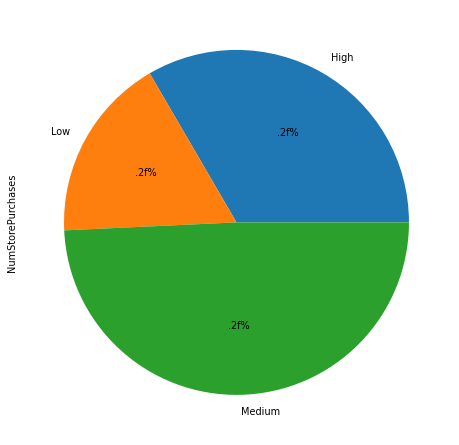

In [72]:
(df.groupby("Income_level").NumStorePurchases.sum() / df.NumStorePurchases.sum()).plot(kind = "pie",
                                                                                      subplots = True,
                                                                                      autopct = ".2f%%",
                                                                                      figsize = (10,8))

"Medium" level buyed more from the store

array([<Axes: ylabel='NumWebVisitsMonth'>], dtype=object)

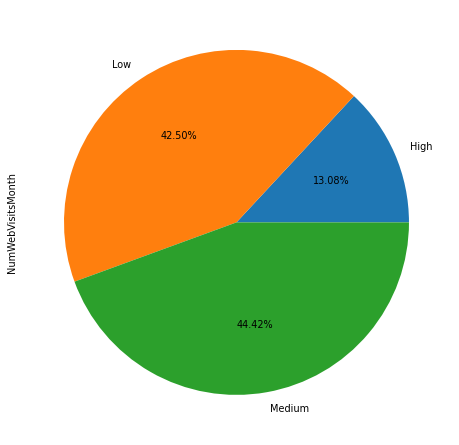

In [73]:
(df.groupby("Income_level").NumWebVisitsMonth.sum() / df.NumWebVisitsMonth.sum()).plot(kind = "pie",
                                                                                      subplots = True,
                                                                                      autopct = "%.2f%%",
                                                                                       figsize = (10,8))
                                                                            

Last month sales rates

In [74]:
df["Total_Purchases"] = df.NumWebPurchases + df.NumStorePurchases

In [75]:
df.groupby("Income_level").Total_Purchases.sum() / df.Total_Purchases.sum() *100

Income_level
High      32.074704
Low       17.274125
Medium    50.651171
Name: Total_Purchases, dtype: float64

array([<Axes: ylabel='Total_Purchases'>], dtype=object)

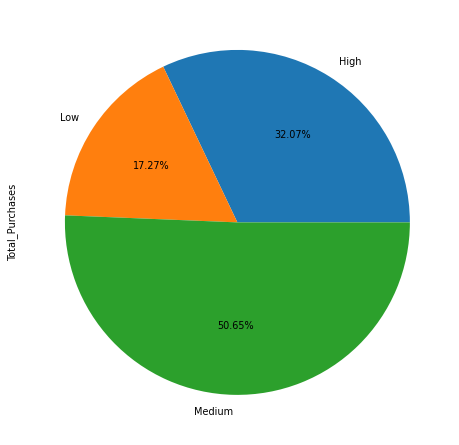

In [76]:
(df.groupby("Income_level").Total_Purchases.sum() / df.Total_Purchases.sum()).plot(kind = "pie",
                                                                                  subplots = True,
                                                                                  autopct = "%.2f%%",
                                                                                  figsize = (10,8))

Medium is at the forefront in general shopping

In [77]:
df.groupby("Income_level").MntTotal.sum() / df.MntTotal.sum() * 100

Income_level
High      52.399468
Low        5.062767
Medium    42.537766
Name: MntTotal, dtype: float64

array([<Axes: ylabel='MntTotal'>], dtype=object)

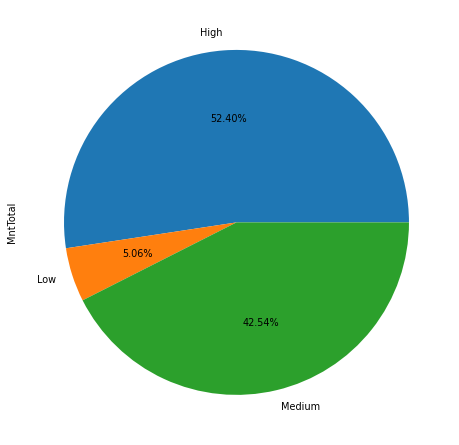

In [78]:
(df.groupby("Income_level").MntTotal.sum() / df.MntTotal.sum()).plot(kind = "pie",
                                                                    subplots = True,
                                                                    autopct = "%.2f%%",
                                                                    figsize = (10,8))

While the total number of purchases is higher in "Medium" , the total income is higher in "High"

In [79]:
df.groupby("TotalKid").Total_Cmp.sum()

TotalKid
0    552
1    337
2    102
3     10
Name: Total_Cmp, dtype: int64

<Axes: >

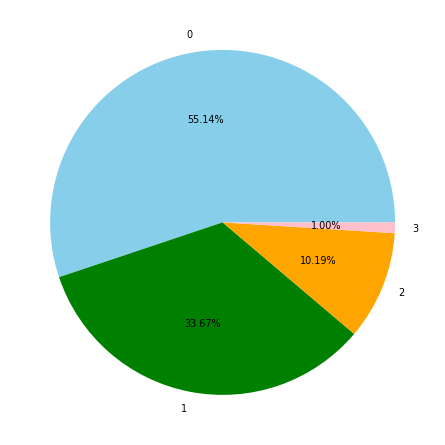

In [80]:
df.groupby("TotalKid").Total_Cmp.sum().plot(kind = "pie",
                                           legend = False,
                                           ylabel = "",
                                           layout = (2,2),
                                           figsize = (10,8),
                                           autopct = "%.2f%%",
                                           colors = ["skyblue", "green", "orange", "pink"])

Participation rates in the total campaign are higher in families with no children.

In [81]:
df.MntMeatProducts.sum()

373950

In [82]:
df.MntMeatProducts.sum() / df.MntTotal.sum() * 100

27.55861410275873

27% of the expenditures went to fruits

In [83]:
df.MntFishProducts.sum()

84049

In [84]:
df.MntFishProducts.sum() / df.MntTotal.sum() * 100

6.19407395834408

6% of the expenditures went to fishs

In [85]:
df.MntSweetProducts.sum()

60620

In [86]:
df.MntSweetProducts.sum() / df.MntTotal.sum() * 100

4.46745069370032

4% of the expenditures went to sweets

In [87]:
df.MntGoldProds.sum()

98597

In [88]:
df.MntGoldProds.sum() / df.MntTotal.sum() * 100

7.266203168043061

7% of the expenditures went to gold

<Axes: xlabel='MntTotal', ylabel='Count'>

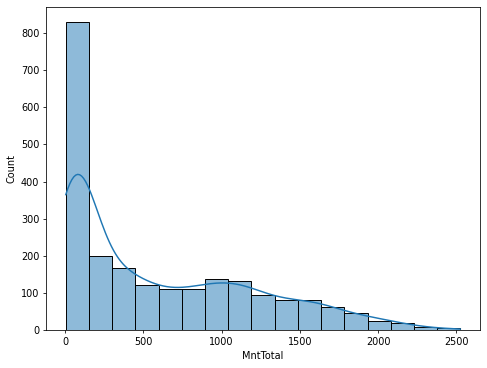

In [89]:
sns.histplot(df.MntTotal, kde = True)

As expected, the number decreases as total shopping amounts increase.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'MntWines'),
  Text(1, 0, 'MntFruits'),
  Text(2, 0, 'MntMeatProducts'),
  Text(3, 0, 'MntFishProducts'),
  Text(4, 0, 'MntSweetProducts'),
  Text(5, 0, 'MntGoldProds')])

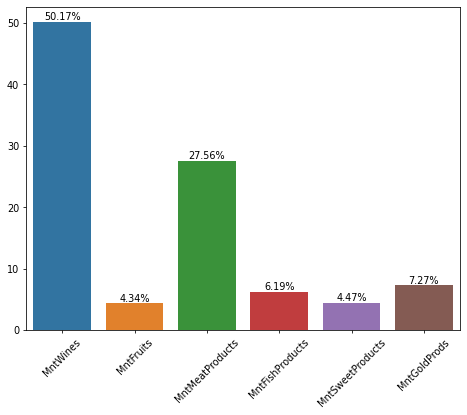

In [90]:
ax = sns.barplot(x = (df[df.columns[df.columns.str.match("Mnt")]].sum()[:-1] / df.MntTotal.sum() * 100).index,
                 y = (df[df.columns[df.columns.str.match("Mnt")]].sum()[:-1] / df.MntTotal.sum() * 100).values,
                 ci = None)

for i in ax.containers:
    plt.bar_label(i, fmt = "%.2f%%")
plt.xticks(rotation = 45)    
    

Purchase rates of products in a single table

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'AcceptedCmp3'),
  Text(1, 0, 'AcceptedCmp4'),
  Text(2, 0, 'AcceptedCmp5'),
  Text(3, 0, 'AcceptedCmp1'),
  Text(4, 0, 'AcceptedCmp2'),
  Text(5, 0, 'AcceptedCmp6')])

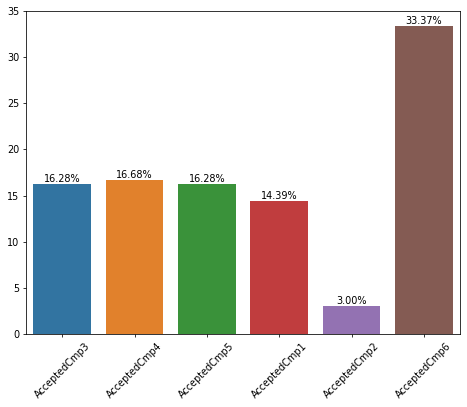

In [91]:
ax = sns.barplot(x = (df[df.columns[df.columns.str.contains("Cmp")]].sum()[:-1] / df.Total_Cmp.sum() * 100).index,
                 y = (df[df.columns[df.columns.str.contains("Cmp")]].sum()[:-1] / df.Total_Cmp.sum() * 100).values,
                     ci = None)

for i in ax.containers:
    plt.bar_label(i, fmt = "%.2f%%")
plt.xticks(rotation = 45)    

We see that the most participation was in the last campaign.

In [92]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Complain,Country,Income_level,TotalKid,MntTotal,Total_Cmp,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,1,No,SP,High,0,1190,1,10
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,1,1,No,CA,Medium,0,577,2,14
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,No,US,Medium,1,251,0,8
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,0,0,No,AUS,Low,2,11,0,3
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,0,0,1,No,SP,Low,1,91,2,5


In [93]:
df.nunique()

ID                     2239
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1973
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
AcceptedCmp6              2
Complain                  2
Country                   8
Income_level              3
TotalKid                  4
MntTotal               1054
Total_Cmp                 6
Total_Purchases          27
dtype: int64

In [94]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

In [95]:
df.Dt_Customer

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2239, dtype: datetime64[ns]

In [96]:
df.Dt_Customer = df.Dt_Customer.dt.year

In [97]:
df.Dt_Customer.unique()

array([2014, 2013, 2012])

In [98]:
df.groupby("Dt_Customer").Income.mean()

Dt_Customer
2012    51150.236735
2013    51907.967577
2014    52827.285714
Name: Income, dtype: float64

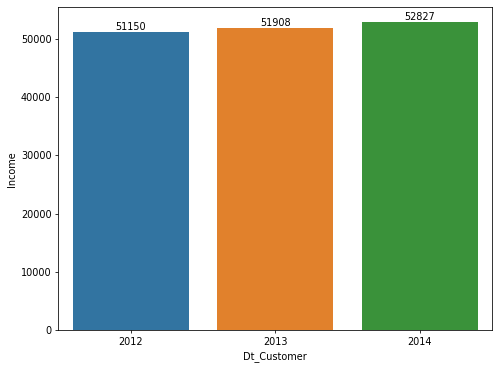

In [99]:
ax = sns.barplot(x = df.Dt_Customer, y = df.Income, ci = None)

for i in ax.containers:
    plt.bar_label(i, fmt = "%.0f")

The average income of customers registered over the years is almost the same

In [100]:
df.groupby("Dt_Customer").Income_level.value_counts()

Dt_Customer  Income_level
2012         Medium          225
             Low             164
             High            105
2013         Medium          530
             Low             377
             High            281
2014         Medium          221
             Low             191
             High            145
Name: Income_level, dtype: int64

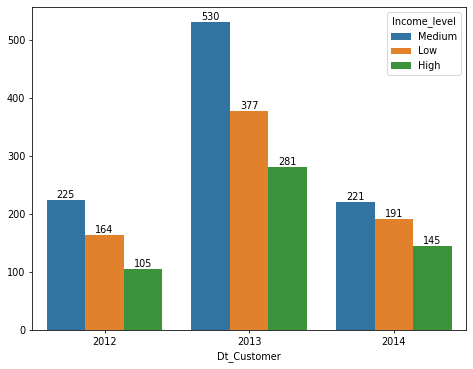

In [101]:
ax = sns.barplot(x = df.groupby("Dt_Customer").Income_level.value_counts().index.get_level_values(0),
                 y = df.groupby("Dt_Customer").Income_level.value_counts().values,
                 hue = df.groupby("Dt_Customer").Income_level.value_counts().index.get_level_values(1))

for i in ax.containers:
    plt.bar_label(i, fmt = "%.0f")

The number of registrations of people with medium income level has been quite high in 3 years.

array([<Axes: title={'center': 'High'}>, <Axes: title={'center': 'Low'}>,
       <Axes: title={'center': 'Medium'}>], dtype=object)

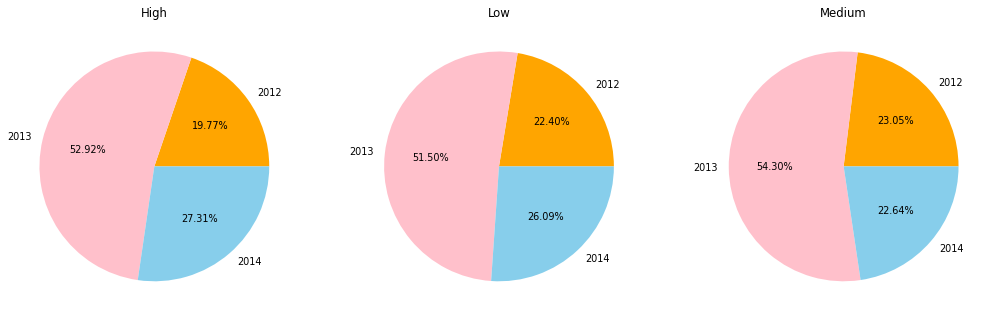

In [102]:
(df.groupby("Dt_Customer").Income_level.value_counts()).unstack().plot(kind = "pie",
                                                                       subplots = True,
                                                                      legend = False,
                                                                      ylabel = "",
                                                                      title = (df.groupby("Income_level").Dt_Customer.value_counts()).unstack().index.tolist(),
                                                                       autopct = "%.2f%%",
                                                                       figsize = (18,13),
                                                                       colors = ["orange", "pink", "skyblue"])

There is no connection between income levels according to years of participation

In [103]:
df.Year_Birth.value_counts()


1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1965    74
1973    74
1969    71
1974    69
1956    55
1979    53
1958    53
1952    52
1959    51
1977    51
1968    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1964    42
1983    42
1986    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1944     7
1943     7
1993     5
1995     5
1994     3
1996     2
1893     1
1899     1
1941     1
1940     1
1900     1
Name: Year_Birth, dtype: int64

In [104]:
df.Marital_Status.value_counts()

Married     864
Together    579
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [105]:
df.Marital_Status = df.Marital_Status.apply(lambda x : "Together" if (x == "Married" or x == "Together") else "Alone")



In [106]:
df.Marital_Status.value_counts()

Together    1443
Alone        796
Name: Marital_Status, dtype: int64

In [107]:
df.groupby("Marital_Status").Income.mean()

Marital_Status
Alone       52088.945293
Together    51904.361092
Name: Income, dtype: float64

<Axes: xlabel='Marital_Status', ylabel='Income'>

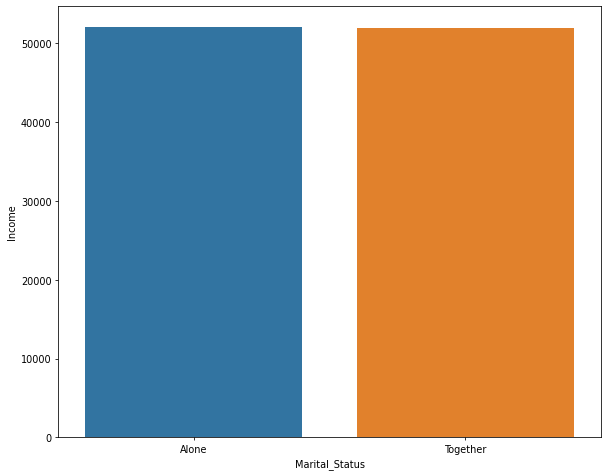

In [108]:
plt.figure(figsize = (10,8))
sns.barplot(x = df.Marital_Status, y = df.Income, ci = None)

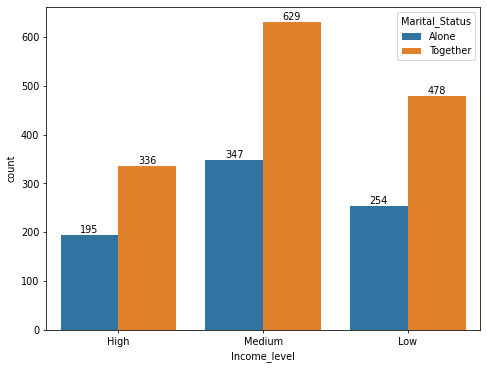

In [109]:
ax = sns.countplot(x = df.Income_level, hue = df.Marital_Status)

for i in ax.containers:
    plt.bar_label(i)

In [110]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Complain,Country,Income_level,TotalKid,MntTotal,Total_Cmp,Total_Purchases
0,1826,1970,Graduation,Alone,84835.0,0,0,2014,0,189,...,0,0,1,No,SP,High,0,1190,1,10
1,1,1961,Graduation,Alone,57091.0,0,0,2014,0,464,...,0,1,1,No,CA,Medium,0,577,2,14
2,10476,1958,Graduation,Together,67267.0,0,1,2014,0,134,...,0,0,0,No,US,Medium,1,251,0,8
3,1386,1967,Graduation,Together,32474.0,1,1,2014,0,10,...,0,0,0,No,AUS,Low,2,11,0,3
4,5371,1989,Graduation,Alone,21474.0,1,0,2014,0,6,...,0,0,1,No,SP,Low,1,91,2,5
